In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
data = pd.read_csv("regression_datasets_large.xlsx - Electricity_Bill.csv")   # put the correct filename here
data.head()

,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5
3,4,156,150,6.5,185,56,Residential,East,2023,735.0
4,5,121,150,6.0,94,158,Residential,West,2024,689.5


In [4]:
X = data[["Units_Consumed"]]   # independent variable
y = data["Bill_Amount"]        # dependent variable

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
slope = model.coef_[0]          # cost per unit
intercept = model.intercept_    # fixed charge
print("Slope (per unit charge):", slope)
print("Intercept (fixed charge):", intercept)

Slope (per unit charge): -0.4405871315234372
Intercept (fixed charge): 2376.606689139105


In [20]:
bill_pred_350 = model.predict(np.array([[350]]))[0]
print("Predicted Bill for 350 units:", bill_pred_350)

Predicted Bill for 350 units: 2222.401193105902


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("R² Score:", r2)

R² Score: 0.004193727521376478


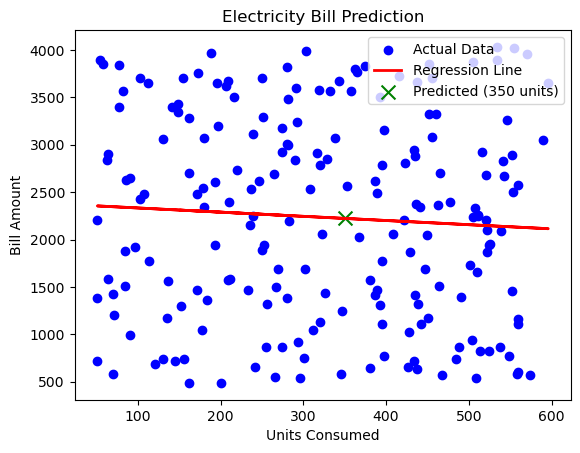

In [9]:
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.scatter(350, bill_pred_350, color="green", s=100, marker="x", label="Predicted (350 units)")

plt.xlabel("Units Consumed")
plt.ylabel("Bill Amount")
plt.title("Electricity Bill Prediction")
plt.legend()
plt.show()